In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 5 Application of detection and kinematical related cuts
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/ApplicationOfCuts/'

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(    
    PIDa_p_min=13
    ,minPEcut = 100
    ,maxdYZcut = 200                              
    ,delta_theta_12=55  # deg.
    ,r_max_RdQ_CC1p0pi = 0.35 # sphere in U,V,Y space, apply a cut only to CC1p0pi
    # --- -- --- - -- -- --- --
    ,delta_Delta_phi=35 # deg.
    ,Pt_max=0.35        # GeV/c
)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

28757 pairs from MC-BNB + cosmic DATA overlay
18979 pairs in FV
5094 are 1mu-1p, 26.8%
4360 are other pairs, 23.0%
9525 are cosmic, 50.2%
--------------------------------------------------------------
2518 are CC 1p 0pi, 13.3%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.8%,100.0%,13.3%,no cut,100.0% (5094),100.0% (4360),100.0% (9525),100.0% (2518)
PIDa,85.5%,53.6%,84.6%,26.2%,${PID}_a>13$,85.5% (4354),55.3% (2409),14.3% (1364),84.6% (2131)
flashes,85.1%,55.9%,84.3%,27.4%,$N_{flashes}>0$,85.1% (4337),55.1% (2401),10.7% (1015),84.3% (2123)
flash,80.4%,57.9%,79.5%,28.3%,optical filter,80.4% (4096),53.2% (2318),6.9% (661),79.5% (2002)
length,66.6%,67.3%,69.5%,34.7%,$l_{\mu}>l_{p}$,66.6% (3393),29.3% (1279),3.9% (371),69.5% (1751)
non-collinearity,59.8%,73.2%,64.8%,39.2%,"$|\theta_{1,2}-90^0|<55^0$",59.8% (3044),20.8% (909),2.1% (203),64.8% (1631)
vertex activity,40.9%,76.9%,55.8%,51.9%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",40.9% (2081),11.8% (516),1.1% (108),55.8% (1404)
delta phi,27.2%,90.8%,42.8%,70.5%,$|\Delta \phi - \pi|<35^0$,27.2% (1387),2.6% (115),0.3% (25),42.8% (1077)
Pt no Delta phi,31.0%,85.0%,46.0%,62.4%,$p_{t}<0.35$ GeV/c,31.0% (1578),5.3% (230),0.5% (49),46.0% (1159)
soft Pt,24.0%,93.1%,38.5%,73.8%,$p_{t}<0.35$ GeV/c,24.0% (1223),1.7% (74),0.2% (16),38.5% (969)


In [4]:
pureff_MCbnbDATAcosmic_numbers

,\CCIpOpi,\mup,cosmic,cut label,cut name,eff \CCIpOpi,eff \mup,other pairs,pur \CCIpOpi,pur \mup
no cut,2518.0,5094.0,9525.0,no cut,no cut,100.000000,100.000000,4360.0,13.267295,26.840192
PIDa,2131.0,4354.0,1364.0,${PID}_a>13$,PIDa,84.630659,85.473106,2409.0,26.221238,53.574505
flashes,2123.0,4337.0,1015.0,$N_{flashes}>0$,flashes,84.312947,85.139380,2401.0,27.382949,55.939636
flash,2002.0,4096.0,661.0,optical filter,flash,79.507546,80.408324,2318.0,28.296820,57.893993
length,1751.0,3393.0,371.0,$l_{\mu}>l_{p}$,length,69.539317,66.607774,1279.0,34.721396,67.281380
non-collinearity,1631.0,3044.0,203.0,"$|\theta_{1,2}-90^0|<55^0$",non-collinearity,64.773630,59.756576,909.0,39.244466,73.243503
vertex activity,1404.0,2081.0,108.0,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",vertex activity,55.758539,40.851983,516.0,51.903882,76.931608
delta phi,1077.0,1387.0,25.0,$|\Delta \phi - \pi|<35^0$,delta phi,42.772041,27.228112,115.0,70.530452,90.831696
Pt no Delta phi,1159.0,1578.0,49.0,$p_{t}<0.35$ GeV/c,Pt no Delta phi,46.028594,30.977621,230.0,62.412493,84.975767
soft Pt,969.0,1223.0,16.0,$p_{t}<0.35$ GeV/c,soft Pt,38.482923,24.008638,74.0,73.800457,93.145468


In [5]:
cutnames = ['no cut','PIDa','flashes','flash','length','non-collinearity','vertex activity'
            ,'delta phi','soft Pt','tight Pt']
cutlabels = ['no cut','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter','track lengths','collinearity','vertex activity'
             ,'coplanarity',r'$p_{t}<0.35$ GeV/c',r'$p_{t}<0.15$ GeV/c']

Ncosmic = len(reduced_MCbnbDATAcosmicSamples['no cut']['cosmic'])
print "plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex"
print 
print "\hline \hline"
i_label = 0
for i,row in pureff_MCbnbDATAcosmic_numbers[:].iterrows(): 
    if row['cut name'] == 'theta_pq': continue
    if i_label>= len(cutlabels): break
        
    if i==cutnames[i_label]:
        if cutlabels[i_label] == 'coplanarity': print '\hline'

        print "			"+r'%s'%row['cut label']+"\
        & \\textcolor{orange}{%d"%row['cosmic']+"}\
        & \\textcolor{red}{%d"%row['other pairs']+"}\
        & \\textcolor{teal}{%d"%row['\mup']+"}\
        & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"  
        
        i_label+=1
print
print

plug in table tab:ApplicationOfCuts in ApplicationOfCuts.tex

\hline \hline
			no cut        & \textcolor{orange}{9525}        & \textcolor{red}{4360}        & \textcolor{teal}{5094}        & \textcolor{blue}{2518}        & \textcolor{teal}{26.8\%}(\textcolor{blue}{13.3\%)}        & \textcolor{teal}{100.0\%}(\textcolor{blue}{100.0\%)}        \tabularnewline
\hline
			${PID}_a>13$        & \textcolor{orange}{1364}        & \textcolor{red}{2409}        & \textcolor{teal}{4354}        & \textcolor{blue}{2131}        & \textcolor{teal}{53.6\%}(\textcolor{blue}{26.2\%)}        & \textcolor{teal}{85.5\%}(\textcolor{blue}{84.6\%)}        \tabularnewline
\hline
			$N_{flashes}>0$        & \textcolor{orange}{1015}        & \textcolor{red}{2401}        & \textcolor{teal}{4337}        & \textcolor{blue}{2123}        & \textcolor{teal}{55.9\%}(\textcolor{blue}{27.4\%)}        & \textcolor{teal}{85.1\%}(\textcolor{blue}{84.3\%)}        \tabularnewline
\hline
			optical filter        & \textcolor{or



## 5.II The impact of the cuts on the $Q^2$ -dependence of the sample

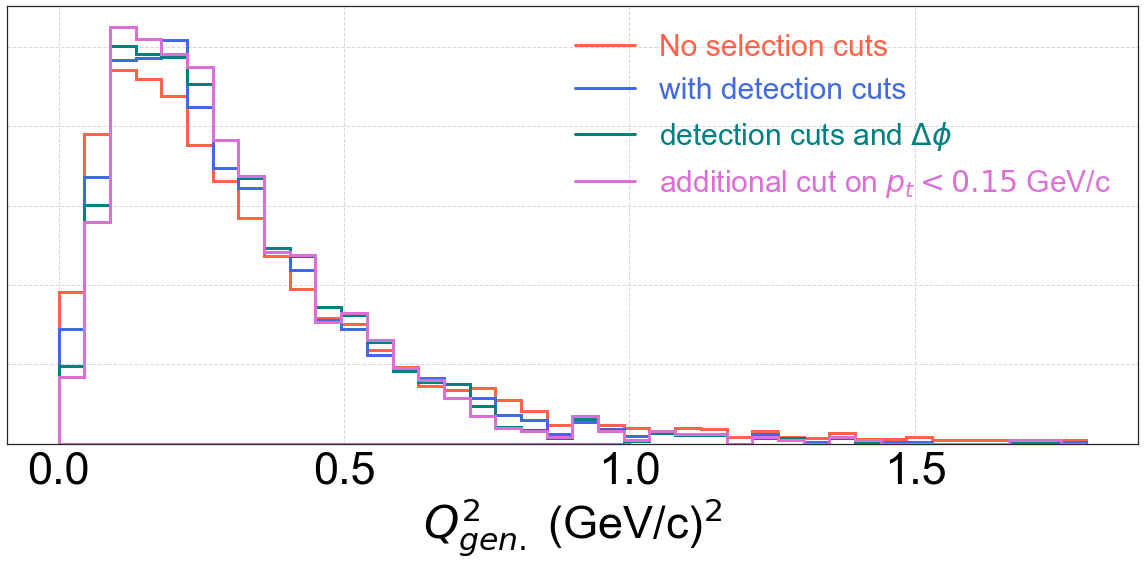

In [6]:
# Q2 before and after the cuts
bins = np.linspace(0.,1.8,41)
cuts   = ['no cut','vertex activity', 'delta phi' , 'soft Pt' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']

fig,ax=plt.subplots(figsize=(16,8))
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    h,bins,_=plt.hist( truth_Q2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
set_axes(ax,'$Q^{2}_{gen.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True,xticks=[0,0.5,1,1.5])

# colored legend
leg = plt.legend(fontsize=30,loc='upper right')
for text,color in zip(leg.get_texts(),colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'Q2_truth_before_after_cuts.pdf')

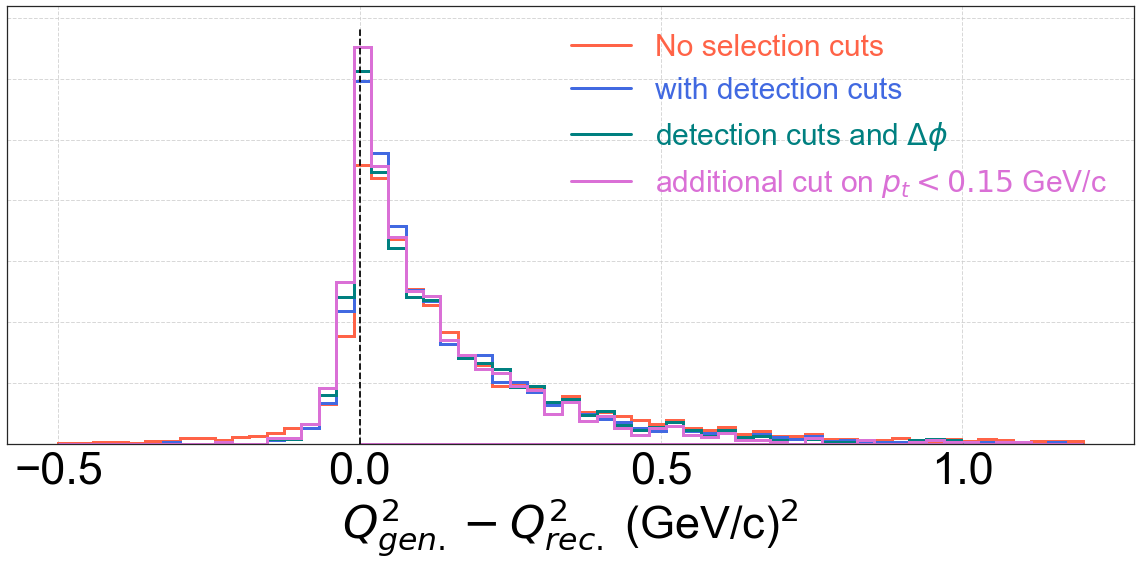

In [7]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-0.5,1.2,60)
fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['closest_genie_Q2']
    reco_Q2 = sample['reco_Q2']
    dQ2 = truth_Q2 - reco_Q2
    h,bins,_=plt.hist( dQ2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$Q^{2}_{gen.} - Q^{2}_{rec.}$ (GeV/c)$^2$',fontsize=45,do_add_grid=True,xticks=[-0.5,0,0.5,1])
# colored legend
leg = plt.legend(fontsize=30,loc='upper right')
for text,color in zip(leg.get_texts(),colors): text.set_color(color)

ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_before_after_cuts.pdf')

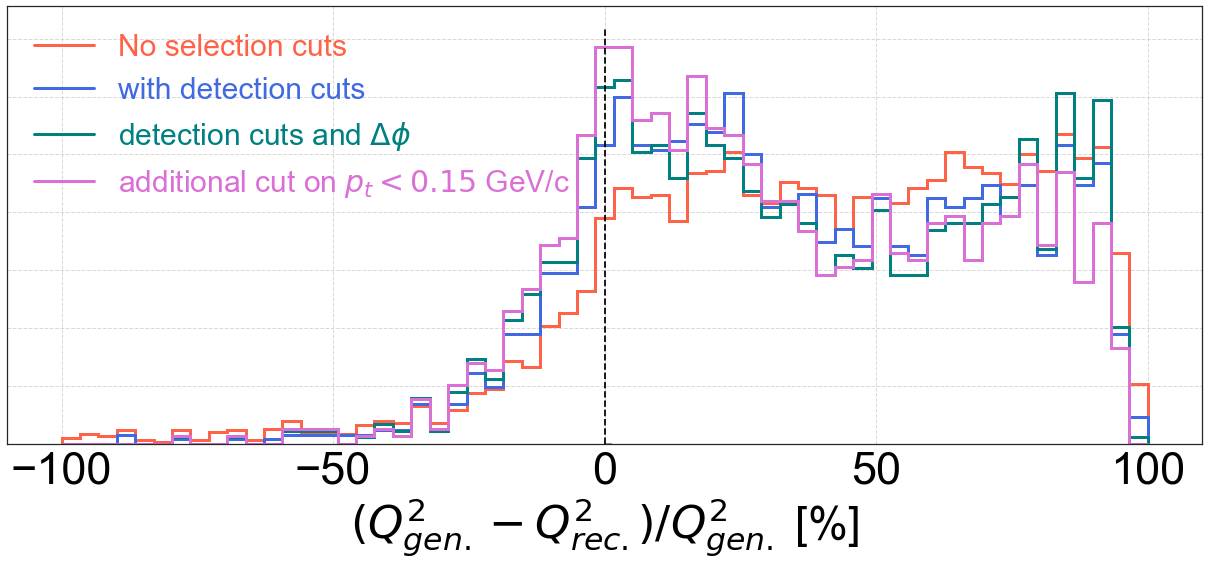

In [8]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-100,100,60)
fig_reco=plt.figure(figsize=(17,8))
ax_reco = fig_reco.add_subplot(111)
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    reco_Q2 = sample['reco_Q2']
    dQ2 = truth_Q2 - reco_Q2
    ratio = 100*dQ2/[Q2 if Q2>0.01 else 0.01 for Q2 in truth_Q2]
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$(Q^{2}_{gen.} - Q^{2}_{rec.})/Q^{2}_{gen.}$ [%]',xticks=[-100,-50,0,50,100],fontsize=45,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=30,loc='upper left')
for text,color in zip(leg.get_texts(),colors): text.set_color(color)

ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_ratio_before_after_cuts.pdf')

# cuts sensitivity with fixed values

In [9]:
def print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus):
    
    print cut_label + " & "

    for pair_label,pair_type,color in zip(['cosmic','other pairs','\mup','\CCIpOpi']                                
                                          ,['cosmic','other pairs','1mu-1p','CC 1p 0pi']
                                          ,['orange','red','teal','blue']):
        eff = 100*float(pureff_cut_nominal[pair_label])/len(reduced_MCbnbDATAcosmicSamples['no cut'][pair_type])
        eff_minus = 100*float(pureff_cut_minus[pair_label])/len(reduced_MCbnbDATAcosmicSamples['no cut'][pair_type])
        eff_plus = 100*float(pureff_cut_plus[pair_label])/len(reduced_MCbnbDATAcosmicSamples['no cut'][pair_type])

        prefix = "\\textcolor{"+color+"}"
        label = r"$%.1f^{+%.1f}_{-%.1f}$"%(eff,(eff - eff_plus),(eff_minus - eff))+'\%'
        cell_string = prefix + "{"  + label + "} & "

        print cell_string

    pur_mup = float(pureff_cut_nominal['pur \mup'])
    pur_mup_minus = float(pureff_cut_minus['pur \mup'])
    pur_mup_plus = float(pureff_cut_plus['pur \mup'])
    prefix = "\\textcolor{teal}"
    label = r"$%.1f^{+%.1f}_{-%.1f}$"%(pur_mup,(pur_mup - pur_mup_minus),(pur_mup_plus - pur_mup))+'\%'
    cell_string = prefix + "{"  + label + "} & "

    print cell_string

    pur_CC1p0pi = float(pureff_cut_nominal['pur \CCIpOpi'])
    pur_CC1p0pi_minus = float(pureff_cut_minus['pur \CCIpOpi'])
    pur_CC1p0pi_plus = float(pureff_cut_plus['pur \CCIpOpi'])
    prefix = "\\textcolor{blue}"
    label = r"$%.1f^{+%.1f}_{-%.1f}$"%(pur_CC1p0pi,(pur_CC1p0pi - pur_CC1p0pi_minus),(pur_CC1p0pi_plus - pur_CC1p0pi))+'\%'
    cell_string = prefix + "{"  + label + "}"

    print cell_string
    print "\\tabularnewline"
    print "\hline"

    print
    print

In [10]:
# plug in table tab:cutsSensitivity in report (ApplicationOfCuts.tex)
print "plug in table tab:cutsSensitivity in report (ApplicationOfCuts.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& \\textcolor{teal}{\mup\ purity} 	& \\textcolor{blue}{\CCIpOpi\ purity} 		\\tabularnewline"
print "\hline \hline"

# PIDa cut
cut_nominal , cut_minus , cut_plus = 12 , 11 , 13
cut_label = '$PID_a^p > %.0f^{+%.0f}_{-%.0f}$'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='PIDa']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='PIDa-']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='PIDa+']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)

# theta12 cut
cut_nominal , cut_minus , cut_plus = 60 , 55 , 65
cut_label = '$|\\theta_{12}-90^0| < (%.0f^{+%.0f}_{-%.0f})^0$'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='non-collinearity']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='theta12+']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='theta12-']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)


# RdQ cut
cut_nominal , cut_minus , cut_plus = 0.33 , 0.25 , 0.4
cut_label = '$r_{R_{\\Delta Q}}^{max} = %.2f^{+%.2f}_{-%.2f}$'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='vertex activity']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='RdQ+']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='RdQ-']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)

# delta phi cut
cut_nominal , cut_minus , cut_plus = 40 , 35 , 45
cut_label = '$|\\Delta \phi - \pi|< (%.0f^{+%.0f}_{-%.0f})^0$'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='\CutDeltaPhi']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='delta_phi+']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='delta_phi-']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)


# delta phi cut
cut_nominal , cut_minus , cut_plus = 0.35 , 0.3 , 0.4
cut_label = '$p_{t} < %.2f^{+%.2f}_{-%.2f}$ GeV/c'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='soft Pt']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='Pt+']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='Pt-']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)


plug in table tab:cutsSensitivity in report (ApplicationOfCuts.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& \textcolor{teal}{\mup\ purity} 	& \textcolor{blue}{\CCIpOpi\ purity} 		\tabularnewline
\hline \hline
$PID_a^p > 12^{+1}_{-1}$ & 
\textcolor{orange}{$14.3^{+0.0}_{-5.3}$\%} & 
\textcolor{red}{$55.3^{+0.0}_{-6.3}$\%} & 
\textcolor{teal}{$85.5^{+0.0}_{-4.7}$\%} & 
\textcolor{blue}{$84.6^{+0.0}_{-4.9}$\%} & 
\textcolor{teal}{$53.6^{+3.3}_{-0.0}$\%} & 
\textcolor{blue}{$26.2^{+1.6}_{-0.0}$\%}
\tabularnewline
\hline


$|\theta_{12}-90^0| < (60^{+5}_{-5})^0$ & 
\textcolor{orange}{$2.1^{+0.2}_{-0.2}$\%} & 
\textcolor{red}{$20.8^{+1.9}_{-1.9}$\%} & 
\textcolor{teal}{$59.8^{+2.7}_{-1.7}$\%} & 
\textcolor{blue}{$64.8^{+2.2}_{-1.3}$\%} & 
\textcolor{teal}{$73.2^{+1.2}_{-1.0}$\%} & 
\textcolor{blue}{$39.2^{+1.0}_{-1.0}$\%}
\tabularnewline
\hline


$r_{R_{\Delta Q}}^{max} = 0.33^{+0.07}

TypeError: cannot convert the series to <type 'float'>

In [ ]:
# tab:cutsSensitivity_theta_pq
# \theta_pq cut
cut_nominal , cut_minus , cut_plus = 25,15,35
cut_label = r'$\theta_{pq} < \left(%.0f^{+%.0f}_{-%.0f}\right)^0$ deg'%(cut_nominal , (cut_plus-cut_nominal) , (cut_nominal-cut_minus) )
pureff_cut_nominal = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='theta_pq']
pureff_cut_minus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='theta_pq+']
pureff_cut_plus = pureff_MCbnbDATAcosmic_numbers[pureff_MCbnbDATAcosmic_numbers['cut name']=='theta_pq-']
print_table_line(pureff_cut_nominal,pureff_cut_minus,pureff_cut_plus)